Title: **Aviva Interview Task**  
By: **Ella Pournezhadian**  
Interview Date: **23 Dec 2023**  

----------------------------------------

In [1]:
import pandas as pd
import json
import uuid
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
import unittest

C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Step 1: Loading JSON Dataset

Loading JSON file and converting into DataFrame

In [2]:
# Loading the JSON data
try:
    with open("input_data.json", "r") as file:
        petitions = json.load(file)
except FileNotFoundError:
    print("The file 'input_data.json' was not found.")
except json.JSONDecodeError:
    print("Error decoding the JSON file.")

In [3]:
# Extracting and preprocess data
data = []
for petition in petitions:
    title = petition['label']['_value']
    abstract = petition['abstract']['_value']
    num_signatures = petition['numberOfSignatures']
    data.append({
        "title": title,
        "abstract": abstract,
        "num_signatures": num_signatures
    })

In [4]:
# Converting to DataFrame
df = pd.DataFrame(data)

Exploring DataFrame to understand the data

In [5]:
df.describe()

,num_signatures
count,1.238700e+04
mean,3.777217e+03
std,7.052059e+04
min,6.000000e+00
25%,2.000000e+01
50%,5.800000e+01
75%,3.575000e+02
max,6.077572e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12387 entries, 0 to 12386
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           12387 non-null  object
 1   abstract        12387 non-null  object
 2   num_signatures  12387 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 290.4+ KB


In [7]:
df.head(10)

,title,abstract,num_signatures
0,Reform the Commons: Three days full time with ...,"MPs should attend all debates, not merely turn...",27
1,Instruct the DVLA to charge road tax during th...,When you change your car you pay road tax for ...,223
2,Disestablish the Church of England and establi...,"CofE attendance is 765,000, representing 1.4% ...",176
3,"Once completed, Renumber the A1(M) North of Ab...",Once the Leeming to Barton stretch of the A1(M...,15
4,Make care home fees free for all and not just ...,People only get assistance with care home fees...,12
5,Stop all chain supermarkets selling eggs from ...,We read about the poor conditions that some an...,31
6,Allow transgender people to self-define their ...,Transgender people in the UK are forced to pay...,26
7,Make the most effective oral NHS tablets for M...,The two most effective NHS oral tablets to pre...,65
8,"Make the 5th of July NHS day, and a national h...","I feel that many now, so far on from it's ince...",181
9,Anti depressants should be free to everyone wh...,"I’m calling for this to be reviewed, contracep...",13


# Step 2: Setting up "*stop words*" and "*Lemmatizer*"

In [8]:
# Downloading NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')  # For better lemmatization
nltk.download('averaged_perceptron_tagger')  # For POS tagging

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [9]:
# Setup stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Step 3: Defining Functions

In [10]:
def tokenize_and_filter(text):
    '''This function Removes the stop words, and Lemmatize them, then tokenizes them.'''
    
    words = word_tokenize(text.lower())
    tagged_words = pos_tag(words)
    filtered_words = []
    for word, tag in tagged_words:
        if word not in stop_words:
            if tag.startswith('N'):  
                lemmatized_word = lemmatizer.lemmatize(word, pos='n') 
                if len(lemmatized_word) >= 5:
                    filtered_words.append(lemmatized_word)
            else:
                if len(word) >= 5:
                    filtered_words.append(word)
    
    return filtered_words

In [11]:
# Generating word counts
def generate_word_counts(tokens, common_words):
    word_counts = {word: tokens.count(word) for word in common_words}
    return word_counts

# Step 4: Processing Data

In [12]:
# Generating uniqueid
df["petition_id"] = [str(uuid.uuid4()) for _ in range(len(df))]
df["all_text"] = df["title"] + " " + df["abstract"]

In [13]:
df_lemmatize = df.copy()

In [14]:
# Applying tokenizing (with&without Lemmatizing)
df_lemmatize["tokens"] = df_lemmatize["all_text"].apply(tokenize_and_filter)

In [15]:
# Finding the 20 most common words across all petitions
all_words_lemmatize = [word for tokens in df_lemmatize["tokens"] for word in tokens]
most_common_words_lemmatize = [word for word, _ in Counter(all_words_lemmatize).most_common(20)]

In [16]:
# Generating common word counts
df_lemmatize = df_lemmatize.join(df_lemmatize["tokens"].apply(lambda tokens: pd.Series(generate_word_counts(tokens, most_common_words_lemmatize))))

In [17]:
# Final output with petition_id and word counts
lemmatize_output = df_lemmatize[["petition_id"] + most_common_words_lemmatize]

# Step 5: Test

In [18]:
# Unit tests for key functions
class TestPetitionProcessing(unittest.TestCase):

    def test_tokenize_and_filter(self):
        text = "Testing, voting, generating,years these are random words for children."
        result = tokenize_and_filter(text)
        expected = ["testing", "voting", "generating", "random", "child"] 
        self.assertEqual(result, expected)
        
if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


# Step 5: Plotting the results and Saving final Output into CSV

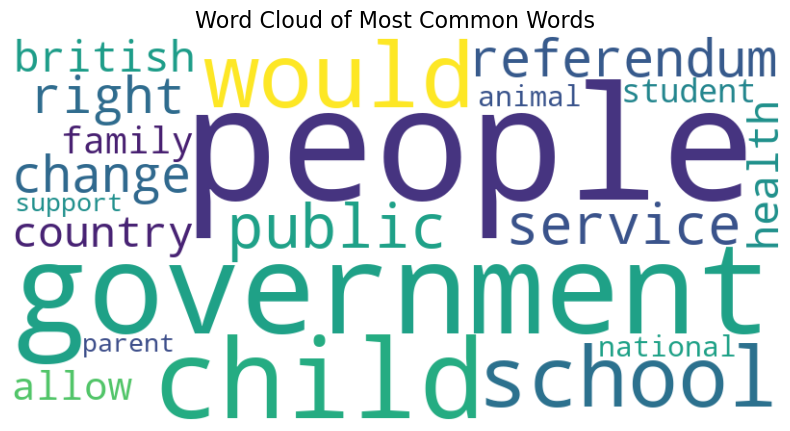

In [19]:
# Plotting the results for the most common words using WordCloud
total_counts = {word: lemmatize_output[word].sum() for word in most_common_words_lemmatize}
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(total_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Most Common Words", fontsize=16)
plt.show()

In [20]:
# Save to CSV
output_csv_path = "output_petitions.csv"
lemmatize_output.to_csv(output_csv_path, index=False)

print(f"Output saved to {output_csv_path}")

Output saved to output_petitions.csv


**Finished**